<a href="https://colab.research.google.com/github/jqirko6/data-science/blob/main/Copy_of_TRAIN_YLC_Homework_6_STUDENT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework \#6: K-Nearest Neighbors Part II
---



## **Part 0: Import sklearn**
---

**Run the code below before continuing.**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, model_selection, metrics

## **Part 1: The Key Pieces**
---

In this section, you will practice the key pieces that we have seen when implementing KNN models for different datasets.

### **Exercise #1: Feature Selection**
---
In this exercise, you will determine the features that you think are best for using in a KNN model.

**For each part, there will be corresponding questions on Canvas.**

1. Load in the data at the provided url and look at the first few rows of the DataFrame.

In [ ]:
url = "https://docs.google.com/spreadsheets/d/e/2PACX-1vTTY64uwF1NcVXhm4MjkPmgqQbpZ4E-h6MzEWcD3j_mrMHtTmcLoGfNrF7VgJ92SgPcgbIrQcmoqUaP/pub?gid=735416119&single=true&output=csv"
df = pd.read_csv(url)

df.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,5.841547,2.919675,1.528776,1,1,0,1,0
1,2.826652,1.335472,0.457052,1,0,0,1,0
2,79.452616,0.732648,0.846234,1,1,0,1,0
3,15.371582,0.301456,2.768575,1,1,0,1,0
4,10.068538,0.083172,2.072339,1,1,0,1,0


2. Print out the variance of each feature in this DataFrame.

In [ ]:
df.var()

distance_from_home                2481.234455
distance_from_last_transaction     308.306236
ratio_to_median_purchase_price       7.536876
repeat_retailer                      0.096820
used_chip                            0.227312
used_pin_number                      0.100523
online_order                         0.225582
fraud                                0.086489
dtype: float64

3. Print out the correlation between the features in this DataFrame.

In [1]:
df.corr()

NameError: name 'df' is not defined

### **Exercise #2: Create a KNN model trained on new data**
---

In this problem, you will be provided data about a type of star known as a pulsar that sends out radio signals in pulses. Astronomers measure radio signals coming from space and try to classify them as pulsars or not.

The data provided to you has 5 columns:

* `mean` is the average of the radio signal frequencies
* `range` is the range of the radio signal frequencies
* `outliers` is a measure of how much the parts of the radio frequencies fit in with each other
*  `asymmetry` is how asymmetrical the radio signal frequencies are over time
* `pulsar` is whether the data corresponds to a pulsar (`pulsar = 1`) or not (`pulsar = 0`)

<br>

**Remember to answer the questions on Canvas corresponding to this section.**

1. Load in the data.

In [ ]:
url = "https://docs.google.com/spreadsheets/d/e/2PACX-1vSgc-uQoaqMmEJKM5rZKRQSW73NqIrdHBjVRAppLTw8O2g_Y3NhgaShmU6drAC-ly3hEHJuMDzeJg_P/pub?gid=827391263&single=true&output=csv"
df = pd.read_csv(url)

df.head()

,mean,range,outliers,asymmetry,pulsar
0,121.156250,48.372971,0.375485,-0.013165,0
1,76.968750,36.175557,0.712898,3.388719,0
2,130.585938,53.229534,0.133408,-0.297242,0
3,156.398438,48.865942,-0.215989,-0.171294,0
4,84.804688,36.117659,0.825013,3.274125,0


2. Split the data into training and testing sets.

In [ ]:
inputs = df[["range", "outliers"]]
output = df["pulsar"]

X_train, X_test, y_train, y_test = model_selection.train_test_split(inputs, output, test_size=0.2, random_state=42)

As we saw in lecture, it's important to scale our data. **Run the code below to do this.**

In [ ]:
mu = X_train.mean()
sig = X_train.std()

X_train = (X_train - mu)/sig
X_test = (X_test - mu)/sig

3. Train a KNN model with `K = 1000` (a "1000NN" model) on the training data.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors = 1000)
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1000)

4. Evaluate this model's accuracy using the test data.

In [ ]:
from sklearn.metrics import accuracy_score

predictions = model.predict(X_test)
accuracy_score(y_test, predictions)

0.9490504863362668

5. Show the model's confusion matrix on the test data.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


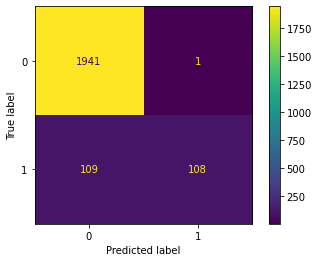

In [ ]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(model, X_test, y_test)

### **Exercise #3: Find the Optimal K**
---

In this problem, you will try out several values of K on the pulsar dataset and see which one is best.


For each K value:
1. train the model
2. determine its accuracy
3. show its confusion matrix

<br>

**Remember to answer the questions on Canvas corresponding to this section.**

1. K = 5

In [ ]:

model = KNeighborsClassifier(n_neighbors = 5)

model.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
predictions = model.predict(X_test)

accuracy_score(y_test, predictions)

0.9773043075497916

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


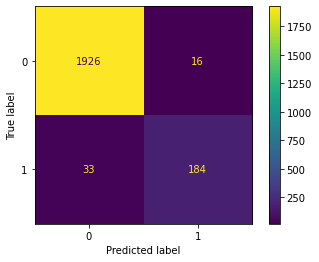

In [ ]:
plot_confusion_matrix(model, X_test, y_test)

2. K = size of dataset

In [ ]:
k = len(X_train)
model = KNeighborsClassifier(n_neighbors = k)
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=8634)

In [ ]:
predictions = model.predict(X_test)

accuracy_score(y_test, predictions)

0.8994905048633627

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


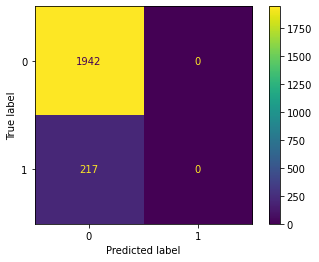

In [ ]:
plot_confusion_matrix(model, X_test, y_test)

3. K = $\sqrt{\text{size of dataset}}$

In [ ]:
k = int(len(X_train)**(1/2))

model = KNeighborsClassifier(n_neighbors = k)
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=92)

In [ ]:
predictions = model.predict(X_test)

accuracy_score(y_test, predictions)

0.9768411301528486

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


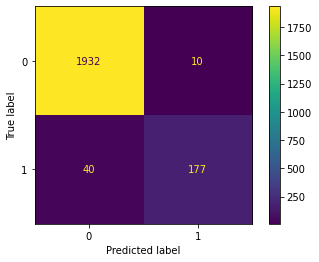

In [ ]:
plot_confusion_matrix(model, X_test, y_test)

4. K = Your Choice! Pick a value and see how it performs.

In [ ]:
model = KNeighborsClassifier(n_neighbors = 500)

model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=500)

In [ ]:
predictions = model.predict(X_test)

accuracy_score(y_test, predictions)

0.9629458082445577

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


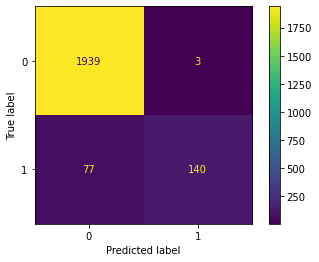

In [ ]:
plot_confusion_matrix(model, X_test, y_test)

### **[OPTIONAL] Train KNN models for k = 1 to 100 and graph the accuracy**
---

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

# defining range of ks as odd numbers from 1 to 100
ks = list(range(1, 100, 2))
param_grid = dict(n_neighbors=ks)


# creating grid searcher for KNN Classifier
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid)


# fitting the model for grid search
grid_search=grid.fit(X_train, y_train)


# looking at the scores for this range
print(grid_search.cv_results_['mean_test_score'])


# looking at the best k value
print(grid_search.best_params_)

Plot the test scores (accuracies) vs. K Value.

In [ ]:
# printing results
plt.scatter(ks, grid_search.cv_results_['mean_test_score'])

plt.title("Test Score vs. K Value")
plt.xlabel("K")
plt.ylabel("Test Score")
plt.show()

Create a final model using the best performing K and make predictions for the following data points.

In [ ]:
# COMPLETE THIS CODE

## **[OPTIONAL] Part 2: Is this money real or fake?**
---

### **Description**:
**This is an optional part to work through a full implementation of a high quality KNN model from start to finish. We strongly encourage you to work through this section to the best of you ability, but if you simply do not have the time for it then that is ok!**

<br>

The provided dataset contains information about real and fake banknotes (paper money). Each row represents information about an image of one banknote. This data contains 5 columns:

* `range` is the range of patterns in the banknote image
* `asymmetry` is the lack of symmetry in the banknote image
* `outliers` is the amount of patterns that don't fit in with the rest in the banknote image
* `information` is the amount of total information believed to be contained in the banknote image
* `class` is 0 if the banknote is real and 1 if the banknote is fake

### **Exercise #1: Load in data**
---

In [ ]:
url = "https://docs.google.com/spreadsheets/d/e/2PACX-1vRdRzlASrap1oY15IoQxXZnB5hi0RhIUCp_thFmTYOnJOw_xjR0X8sGDVyTSdPesIwqYEUQL_yelQpj/pub?gid=1496556477&single=true&output=csv"
banknote_df = pd.read_csv(url)

banknote_df.head()

,range,asymmetry,outliers,information,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


### **Exercise #2: Look at the data and select the best features**
---

In [ ]:
banknote_df.var()

range           8.081299
asymmetry      34.445710
outliers       18.576359
information     4.414256
class           0.247112
dtype: float64

In [ ]:
banknote_df.corr()

,range,asymmetry,outliers,information,class
range,1.000000,0.264026,-0.380850,0.276817,-0.724843
asymmetry,0.264026,1.000000,-0.786895,-0.526321,-0.444688
outliers,-0.380850,-0.786895,1.000000,0.318841,0.155883
information,0.276817,-0.526321,0.318841,1.000000,-0.023424
class,-0.724843,-0.444688,0.155883,-0.023424,1.000000


### **Exercise #3: Split the data and standardize based on the training set**
---

In [ ]:
inputs = banknote_df[['range', 'outliers']]
output = banknote_df["class"]

X_train, X_test, y_train, y_test = model_selection.train_test_split(inputs, output, test_size=0.2, random_state=42)

As we saw in lecture, it's important to scale our data. **Run the code below to do this.**

In [ ]:
mu = X_train.mean()
sig = X_train.std()

X_train = (X_train - mu)/sig
X_test = (X_test - mu)/sig

### **Exercise #4: Try different K values to see what is best**
---

Create and evaluate KNN models for different K values using accuracy and the confusion matrix.

#### 1. **K = 1**

In [ ]:
model = KNeighborsClassifier(n_neighbors = 1)
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [ ]:
predictions = model.predict(X_test)
accuracy_score(y_test, predictions)

0.9018181818181819

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


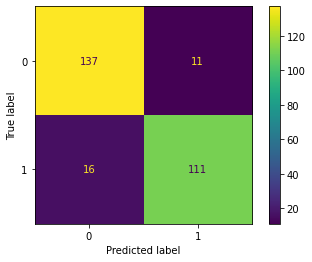

In [ ]:
plot_confusion_matrix(model, X_test, y_test)

#### 2. **K = 3**

In [ ]:
model = KNeighborsClassifier(n_neighbors = 3)
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
predictions = model.predict(X_test)
accuracy_score(y_test, predictions)

0.8945454545454545

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


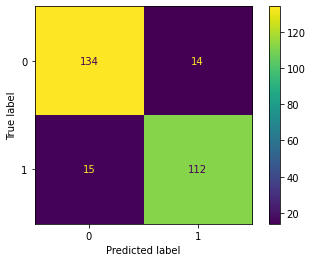

In [ ]:
plot_confusion_matrix(model, X_test, y_test)

#### 3. **K = size of dataset**

In [ ]:
k = len(X_train)
model = KNeighborsClassifier(n_neighbors = k)
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1097)

In [ ]:
predictions = model.predict(X_test)
accuracy_score(y_test, predictions)

0.5381818181818182

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


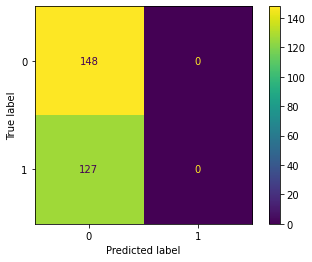

In [ ]:
plot_confusion_matrix(model, X_test, y_test)

#### 4. **K = $\sqrt{\text{size of dataset}}$**

In [ ]:
k = int(len(X_train)**(1/2))

model = KNeighborsClassifier(n_neighbors = k)
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=33)

In [ ]:
predictions = model.predict(X_test)
accuracy_score(y_test, predictions)

0.8763636363636363

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


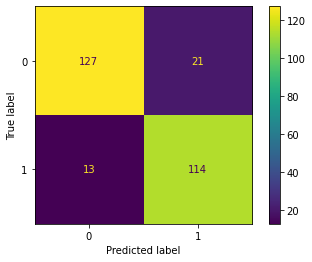

In [ ]:
plot_confusion_matrix(model, X_test, y_test)

Which value of K has the highest accuracy?

Which value of K has the best looking confusion matrix?

### **BONUS Exercise: Train KNN models for k = 1 to 100 and graph the accuracy**
---

**Run the code below to search over all K values from 1 to 100.**

Then, plot the results for different K values and determine the best value.

In [ ]:
from sklearn.model_selection import GridSearchCV

# defining range of ks
ks = list(range(1, 100))
param_grid = dict(n_neighbors=ks)


# creating grid searcher for KNN Classifier
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid)


# fitting the model for grid search
grid_search=grid.fit(X_train, y_train)


# looking at the scores for this range
print(grid_search.cv_results_['mean_test_score'])


# looking at the best k value
print(grid_search.best_params_)

In [ ]:
# PLOT RESULTS

---

# © 2022 The Coding School, All rights reserved